# L3 - Math3-ML - MACHINE LEARNING
## Objectifs du TP3
Il s'agit ici de développer des régresseurs simples. Dans un premier temps, le modèle à estimer sera en 1 dimension afin de faciliter la représentation graphique. Dans un deuxième temps, le modèle pourra être généraliser à plus de variable. L'utilisation du package `numpy` afin de vectoriser les calculs dès la première question permettra de gagner du temps. 
Dans un troisième temps, le modèle des $k$ plus proche voisin sera mis en place dans le cas de la régression sur un jeu de données mesurant le diabète. 
Pour manipuler les données de cette base, nous utiliserons le package `Pandas` vu lors du TP 1.



In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Avant de commencer voici quelques fonctions `numpy` vectorisés qui vous permettront de faciliter vos calculs (gain de temps et d'écriture). Des calculs similaires existent sur les matrices (faire la sommes d'une matrice par colonnes par exemple), nous vous invitons à les regarder aussi pour votre culture générale en python.

In [49]:
#Afin de voir les opérations relevant des erreurs et les erreurs engendrés 
# veuillez décommenter les lignes correspondantes

#Prenons un vecteur de taille 4 pour commencer 
x = np.array([1,2,3,4])
print("x = ",x)
print("Somme à un scalaire: x + 2 = ", x+2)
print("Somme entre vecteur: x + x = ", x+x)
# print("Somme de vecteur de taille différente", x + np.array([1,2]))
print("Produit à un scalaire: x * 2 =", x * 2)
print("Produit entre vecteur: x * x = ", x * x) #Ici nous faisons le produit terme à terme
print("Produit matriciel des vecteurs:", x @ x)
print("Mettre chaque element au carré: x**2: ", x**2)
print("Faire une suite de valeur au carré: 2**x", 2**x)
print("Encore plus fou: x**x", x**x)
print("La racine carré np.sqrt(x)", np.sqrt(x))
print("Certaines fonctions sont aussi vectorisées afin d'éviter de faire des boucles inutiles: ")
print("la somme : np.sum(x): ", np.sum(x))
print("le produit : np.prod(x)", np.prod(x))

# Quelques exemples au travers des normes
print("Norme 1:", np.sum(np.abs(x)))
print("Norme 2:", np.sqrt(np.sum((x)**2)))
print("Norme max:", np.max(np.abs(x)))
p = 3
print("Norme p:", (np.sum(np.abs(x)**p))**(1/p))

x =  [1 2 3 4]
Somme à un scalaire: x + 2 =  [3 4 5 6]
Somme entre vecteur: x + x =  [2 4 6 8]
Produit à un scalaire: x * 2 = [2 4 6 8]
Produit entre vecteur: x * x =  [ 1  4  9 16]
Produit matriciel des vecteurs: 30
Mettre chaque element au carré: x**2:  [ 1  4  9 16]
Faire une suite de valeur au carré: 2**x [ 2  4  8 16]
Encore plus fou: x**x [  1   4  27 256]
La racine carré np.sqrt(x) [1.         1.41421356 1.73205081 2.        ]
Certaines fonctions sont aussi vectorisées afin d'éviter de faire des boucles inutiles: 
la somme : np.sum(x):  10
le produit : np.prod(x) 24
Norme 1: 10
Norme 2: 5.477225575051661
Norme max: 4
Norme p: 4.641588833612778


## Génération des données 1D et régression linéaire simple. 

La régression linéaire consiste à chercher les paramètres $a$ et $b$ définissant la droite $y=ax+b$ qui passe au plus près d’un ensemble de points $(x_k, y_k)$. Les paramètres $a$ et $b$ sont déterminés par la méthodes des moindres carrés qui consiste, dans le cas d’une régression linéaire, à minimiser la quantité :

$$ a,b = \underset{a,b \in \mathbb{R}}{\arg \min} \sum_{k=1}^n (y_k - a x_k - b)^2 $$


 
Par les moindres carrés nous obtenons le résultat suivant: 

$$ \left \{
\begin{array}{r ,c, l}
\hat a & = & \frac{\sum_{i = n}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i = 1}^{n} (x_i - \bar x)^2} \\
\hat b & = & \bar y - \hat a \bar x
\end{array}
\right.
$$



$$
\left \{
\begin{array}{c @{=} c}
    x & \sin a \cos b \\
    y & \sin a \sin b
\end{array}
\right.
$$



**(a)** Créer une fonction qui à partir des coefficients `a` et `b` et un vecteur d'entrée ($x$) donne une simulation de données à expliquer ($y$). Grâce à la fonction `np.random.normal` du package numpy nous allons donner un aspect aléatoire à $y$ tel que : si $\epsilon \sim \mathcal{N}(\mu, \sigma), y = ax + b + \epsilon$.

**(b)** Représenter le nuage de point de x et y. 

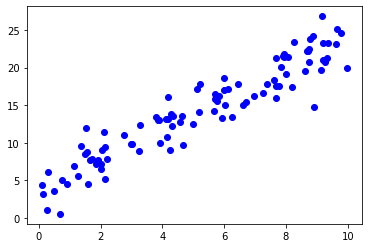

In [50]:
a = 2
b = 4

np.random.normal(0,2,1000)

def nuage(a, b, x): 
    return(a * x + b + np.random.normal(0,2,len(x)))

# Création du vecteur x par simulation d'une loi uniforme
n = 100
x = np.random.uniform(0, 10, n) 
x
y = nuage(a,b,x)

plt.plot(x,y,'bo')

Sur le jeu de données précédemment créé, implémenter l'estimation de la régression linaire au sens des moindres carrés. Commenter les résultats obtenus. Réitérer en augmentant la valeur de n. Qu'observez-vous ? Est ce que les coefficient obtenues sont proches de ceux utilisés pour la simulation ? 

In [51]:
def regression(x,y): 
    mx = np.mean(x)
    my = np.mean(y)
    ha = np.sum((x - mx)*(y - my))/(np.sum((x-mx)**2))
    hb = my - ha * mx
    return(ha, hb)
    
regression(x,y)

(1.97591273966226, 4.021600469870643)

Tracer la courbe obtenu sur le nuage de points tracé précédement. 

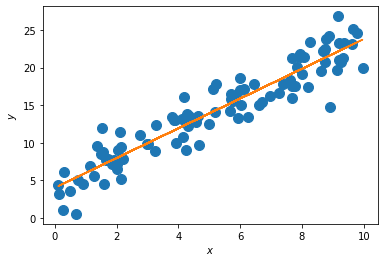

In [52]:
ah, bh = regression(x,y)

# predict the function values at the test points using the OLS coefficients
y_prediction = ah * x + bh 

# plot
plt.figure()
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, y_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

Faisons la même chose sur un jeu de données de test. Le jeu de données de test est un jeu de données neutre (impartial) qui n'a pas été utilisé pour l'ajustement du modèle. 

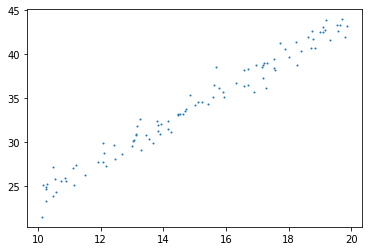

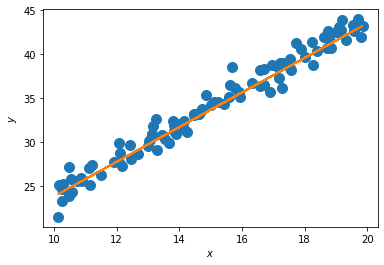

In [57]:
# define a test set
Xtest = np.random.uniform(10, 20, 100) # 100 x 1 vector of test inputs
Ytest = a * Xtest + b +  np.random.normal(0,1,len(Xtest))


# predict the function values at the test points using the OLS coefficients from the train data set
y_prediction = ah * Xtest + bh 

# plot
plt.figure()
plt.plot(Xtest, Ytest, 'o', markersize=10)
plt.plot(Xtest, y_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

Estimer la qualité du modèle peut se faire par le coefficient de détermination $R^2$ qui exprime le rapport entre la variance expliquée par le modèle et la variance totale où bien $R^2 = \frac{SSR}{SST}$

La valeur simplifiée est $$R^2 = 1 - \frac{\sum_{i = 1}^{n} (y_i - \hat y_i)^2}{\sum_{i=1}^{n} (y_i - \bar y)^2}$$

Créer une fonction qui donne cette valeur: 

In [58]:
def R2(y, y_estime): 
    r = 1 - np.sum((y - y_estime)**2)/np.sum((y - np.mean(y))**2)
    return r

Quelle est le coefficient de détermination de votre modèle ? Qu'en pensez vous ? Comment l'interprète-t-on ? 

In [60]:
R2(Ytest, y_prediction)

0.9687770271186903

Maintenant changeons de fonction à estimer. Prenons par exemple $y = \log(x)$. Nous allons apprendre le modèle sur $x_{\text{train}} \in [10,20]$ et tester le modèle sur $x_{\text{test}} = ]0,10]$

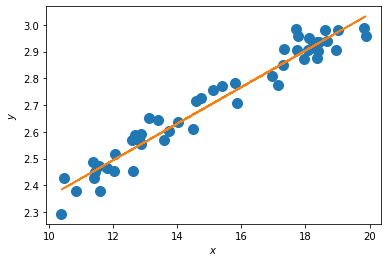

In [84]:
x = np.random.uniform(10,20, 50)
y = np.log(x) +  np.random.normal(0,0.05,len(x))
y_prediction = ah * x + bh 

ah, bh = regression(x,y)

# predict the function values at the test points using the OLS coefficients
y_prediction = ah * x + bh 

# plot
plt.figure()
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, y_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

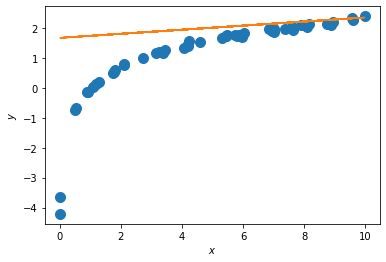

In [85]:
Xtest = np.random.uniform(0, 10, 50) # 100 x 1 vector of test inputs
Ytest = np.log(Xtest) +  np.random.normal(0,0.05,len(Xtest))


# predict the function values at the test points using the OLS coefficients from the train data set
y_predictionTest = ah * Xtest + bh 

# plot
plt.figure()
plt.plot(Xtest, Ytest, 'o', markersize=10)
plt.plot(Xtest, y_predictionTest)
plt.xlabel("$x$")
plt.ylabel("$y$");

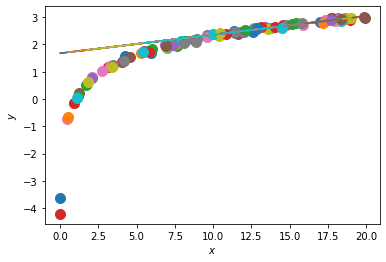

In [86]:
plt.figure()
plt.plot([Xtest, x], [Ytest, y], 'o', markersize=10)
plt.plot([Xtest, x], [y_predictionTest, y_prediction])
plt.xlabel("$x$")
plt.ylabel("$y$");

Quelle est votre conclusion par rapport à ces deux expériences ? Est ce que c'est une approche qui marche bien ? 

# Régression linaire avec plusieurs dimensions explicatives

Dans le cas où $X \in \mathbb{R}^{n \times p}$ avec $p$ le nombre de variable explicative, les résultats précédents peuvent se généraliser. 

Le modèle s'écrit $y = X\beta + \beta_0 +\epsilon$ avec $\beta \in \mathbb{R}^p$ le vecteur de coefficients à estimer, $\beta_0  \in \mathbb{R}$ l'intercept et $\epsilon \in \mathbb{R}^n$ un bruit venant d'une variable aléatoire. Le but de la régression linaire généralisée est d'estimer $\beta$ et $\beta_0$. 
La solution des moidres carrés donne le résultats suivant : 

$$\hat \beta = (X'X)^{-1}X'y$$  si $X'X$ est inversible. 

L'estimation de $\beta_0$ se fait en même temps à condition d'ajouter un vecteur de 1 (en colonne).

Dans un premier temps implémenter un modèle de simulation des données, puis donner la résolution au sens des moindres carrés ainsi que le coefficient de détermination.  

In [7]:
def simulation_multivarié(a, n): 
    X1 = np.random.uniform(0,10,n*(len(a)-1)).reshape(n, len(a)-1)
    on = np.ones((n,1))
    X1 = np.hstack((X1,on))
    y1 = X1.dot(a) + np.random.normal(0,1,n)
    return X1,y1


def regression_multivarie(X1, y1): 
    ha = np.linalg.inv(np.dot(X1.transpose(), X1)).dot(X1.transpose()).dot(y1)
    return(ha)


In [8]:
a = np.array([2,1, 10])
n = 500


X, y = simulation_multivarié(a,  n)
ah = regression_multivarie(X, y)
ah
y_estime = X.dot(ah)
R2(y, y_estime)

0.9775894234297497

## Classification par la méthode des $k$ plus proches voisins

Cet exercice est très proche de celui du TP2. La différence est qu'au lieu d'être dans un cas de classification, nous utiliserons la méthode des $k$ plus proches voisins dans un cadre de régression. Les fonctions utilisées dans le TP précédent peuvent être réutiliser mais attention il faudra en adapter certaines. 

**(a)** Charger dans une `DataFrame` la base de données diabetes du packages `sklearn` qui mesure l'évolution du diabete au bout d'un an de traitement. 

In [88]:
import pandas as pd
from sklearn import datasets

In [89]:
X, y = datasets.load_diabetes( return_X_y=True, as_frame=True)
X = X[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]]
X["target"] = y
df = X
X.head()

,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


**(b)** Créer une fonction `split` qui scindera une DataFrame en deux
    DataFrames dont l'un contiendra 80% des échantillons et l'autre 20%.
    Le premier constituera la base d'apprentissage et le second la base
    de validation (test).

In [91]:
def split(df, train_prop = 0.8):
    df_train = df.sample(frac = train_prop, replace = False)
    df_test = df.drop(df_train.index)
    return df_train, df_test
train, test = split(X)
train

,bmi,bp,s1,s2,s3,s4,s5,s6,target
154,0.020739,-0.005671,0.020446,0.026243,-0.002903,-0.002592,0.008640,0.003064,197.0
10,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062913,-0.034215,101.0
20,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491,68.0
187,-0.054707,-0.026328,-0.075870,-0.082106,0.048640,-0.076395,-0.086829,-0.104630,143.0
318,0.006728,0.025315,0.030078,0.008707,0.063367,-0.039493,0.009436,0.032059,109.0
...,...,...,...,...,...,...,...,...,...
302,0.033673,0.033349,0.030078,0.027183,-0.002903,0.008847,0.031193,0.027917,198.0
1,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
386,-0.040696,-0.015999,-0.008449,-0.017598,0.052322,-0.039493,-0.030751,0.003064,72.0
233,0.036907,-0.050428,-0.023584,-0.034508,0.048640,-0.039493,-0.025952,-0.038357,90.0


**(c)** Utiliser la fonction de mélange de la DataFrame créée lors du TP
    précédent pour mélanger les lignes de vos deux DataFrames.

In [92]:
def Melange(t): 
    return t.sample(frac = 1).reset_index(drop=True)

train = Melange(train)
test = Melange(test)
train

,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.085408,-0.036656,0.091996,0.089499,-0.061809,0.145012,0.080948,0.052770,306.0
1,-0.005128,-0.012556,-0.015328,-0.013840,0.008142,-0.039493,-0.006080,-0.067351,92.0
2,-0.040696,-0.067642,-0.031840,-0.037013,0.037595,-0.039493,-0.034524,0.069338,42.0
3,0.016428,0.028758,-0.041472,-0.029184,-0.028674,-0.002592,-0.002397,-0.021788,225.0
4,0.023973,-0.022885,-0.024960,-0.026053,-0.032356,-0.002592,0.037232,0.032059,265.0
...,...,...,...,...,...,...,...,...,...
349,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
350,0.059541,0.001215,0.012191,0.031567,-0.043401,0.034309,0.014823,0.007207,178.0
351,-0.046085,-0.033214,0.032830,0.036264,0.037595,-0.002592,-0.033249,0.011349,72.0
352,0.035829,0.049415,0.053469,0.074155,-0.069172,0.145012,0.045601,0.048628,248.0


**(d)** Créer une fonction qui, à partir d'un point $P$ donné, calcule la
    liste des distances Euclidiennes de $P$ à tous les autres points de
    la base d'apprentissage.

In [23]:
def dist_eucli(x,y): 
    # mettre un test pour vérifier que les vecteurs aient la même dimension 
    return np.sqrt(np.sum((np.array(x)-np.array(y))**2))

def list_eucli(df, P): 
    dist = []
    for i in df.index:
        dist.append(dist_eucli(df.loc[i],P))
    return dist
x_train = train[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]]
y_train = train[['target']]

**(e)** Créer une fonction qui à partir d'un point $P$ donné et un entier
    $k$ renverra les $k$ plus proches voisins de $P$ au sens de la
    distance Euclidienne calculée précédemment.

In [24]:
def knn(df, p, k): 
    dist = list_eucli(df, p)
    return np.argsort(dist)[0:k] #mets les k individus (index) les plus proches
    
knn(x_train, test[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]].loc[1], k=5)

array([ 31, 217, 254, 209, 315])

**(f)** Créer ensuite une fonction de décision qui, à partir d'un point $P$
    donné et du nombre de voisins $k$, renverra la classe majoritaire
    parmi les $k$ voisins de $P$ considérée comme la classe de $P$.

In [25]:
p = test[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]].loc[1]
print(test[['target']].loc[1])
k = 5
def decisionKNN(df, p, k):
    if k == 0: 
        return 0
    x_df = df[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]]
    y_df = df[['target']]
    indice = knn(x_df, p, k)
    return y_df.loc[indice].mean()
    
decisionKNN(train, p, k=10)
# (test[['class']].loc[9] == y_train.loc[indice].mode())[['class']].loc[0]


target    237.0
Name: 1, dtype: float64


target    178.3
dtype: float64

**(g)** En utilisant la fonction de décision créée précédemment, créer
    maintenant une fonction qui calculera l'erreur de prédiction sur la
    base de test (le deuxième DataFrame).

In [26]:
train = train 
test = test
k = 5

def errorPredict(train, test, k):
    x_test = test[["bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]]
    y_test = test[['target']]
    result = np.empty(test.shape[0])
    for i in test.index: 
        result[i] = (decisionKNN(train, x_test.loc[i], k) - y_test.loc[i])**2
#         print(i)
    return np.sqrt(np.mean(result))
errorPredict(train, test, k=5)

63.69637851843412

**(h)** Etudier l'évolution de l'erreur de prédiction sur la base de test en
    fonction du choix de $k$.


In [27]:
# x = np.round(np.linspace(1,50,50))
x = range(1,51, 2)

y = []

nb_exp = 20

df1 = Melange(df)
for k in x:
    lExp = []
    for exp in range(nb_exp):
        trainX, testX = split(df1, train_prop = .8)
        trainX = Melange(trainX)
        testX = Melange(testX)
        lExp.append(errorPredict(trainX, testX, k =k))
    y.append(np.mean(lExp))

# y = np.array([errorPredict(train, test, k = k) for k in x])

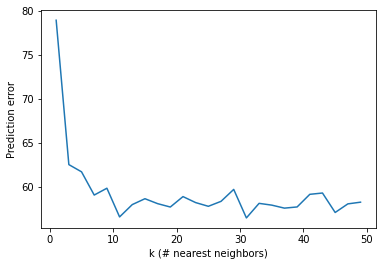

In [28]:
plt.plot(x,y)
plt.ylabel('Prediction error')
plt.xlabel('k (# nearest neighbors)')
plt.show()

**(i)** Etudier l'évolution de l'erreur de prédiction sur la base de test en
    fonction du nombre de points utilisés pour l'apprentissage et pour
    le test.

*Dans les deux questions précédentes, j'ai fais une double boucle. La première boucle permet de changer notre paramètre d'explication (les valeur de l'axe x). La deuxième boucle est faite sur le nombre d'expérience par valeur. Effectivement, si nous faisons qu'une seule simulation par cas, nous ne pouvons être sûr d'avoir la vrai valeur (ou n'avoir qu'une valeur extrème) (cf principe de statistique inférentielle et Loi des Grands Nombres). Cette multi-simulation permet de neutraliser les potentielles valeurs extrèmes. Pour cela il est utile de mettre une partie d'aléatoire. Dans notre cas, l'aléatoire se fait sur la séparation train/test. Il est donc important de refaire à chaque fois le split train/test.
Nous avons pris dans cet exemple 15 simulations. C'est un nombre faible. Si vous devez faire des simulations dans un cas industriel ou scientifique, pensez à prendre un nombre de simulations plus important même si cela implique un temps d'exécution plus grand.*

In [30]:
x = np.linspace(0,1,10)[1:9]
y = np.empty(len(x))

k = 2 #Je fixe arbitrairement le nombre de voisin. 
nb_exp = 15

df1 = Melange(df)
for i in range(len(x)):
    lExp = []
    for exp in range(nb_exp):
        trainX, testX = split(df1, train_prop = x[i])
        trainX = Melange(trainX)
        testX = Melange(testX)
        lExp.append(errorPredict(trainX, testX, k))
    y[i] = np.mean(lExp)

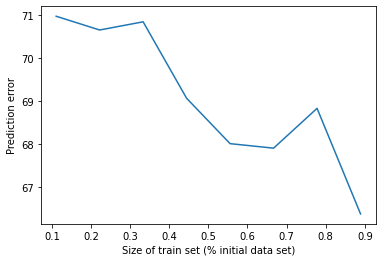

In [31]:
plt.plot(x,y)
plt.ylabel('Prediction error')
plt.xlabel('Size of train set (% initial data set)')
plt.show()

**(j)** Créer des variantes de cet algorithme en remplaçant la distance
    Euclidienne par d'autres choix de distances.

In [32]:
def dist_manhattan(x,y): 
    return np.sqrt(np.sum(np.abs(np.array(x)-np.array(y))))
print(dist_manhattan([1,2,3], [1,2,9]))
print(dist_eucli([1,2,3], [1,2,9]))

# ... faire la mise à jour des autres fonctions

2.449489742783178
6.0


##### Amélioration possible 


###### pour améliorer le modèle 

- validation des hyperparamètres (k)
- changer la distance utilisée (refaire les fonctions en mettant une fonction de distance en paramètre d'entrée)
- changer la règle de décision (pondération des classes selon la distance y,x ; plus que la majorité, mais > 50% ?)